In [1]:
%load_ext line_profiler

In [2]:
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm


In [74]:
from importlib import reload

import GTN2
reload(GTN2)
from GTN2 import *

In [4]:
from importlib import reload

import utils
reload(utils)
from utils import *

In [5]:
from importlib import reload

import GTN2_sp
reload(GTN2_sp)
from GTN2_sp import *

In [6]:
def measure_feedback_layer(gtn2,):
    # margin_x=0 if gtn2.bcx==1 else gtn2.nshell
    margin_x=0 
    ilist = range(margin_x,gtn2.Lx-margin_x)
    # margin_y=0 if gtn2.bcy==1 else gtn2.nshell
    margin_y=0
    jlist = range(margin_y,gtn2.Ly-margin_y)
    ij_list = [(i,j) for i in (ilist) for j in (jlist)]
    for i,j in tqdm(ij_list):
        gtn2.measure_feedback(ij = [i,j])

In [7]:
def randomize(gtn2,measure=True):
    for i in tqdm(range(2*gtn2.L+1,4*gtn2.L,2)):
        # print([i, (i+1)%(2*gtn2.L)+2*gtn2.L])
        gtn2.randomize([i, (i+1)%(2*gtn2.L)+2*gtn2.L])
    if measure:
        for i in tqdm(range(2*gtn2.L,4*gtn2.L,2)):
            gtn2.measure_single_mode_Born([i,i+1],mode=[1])

# Dense

In [341]:
gtn2=GTN2(Lx=20,Ly=20,history=False,random_init=True,random_U1=False,bcx=1,bcy=1,seed=0,orbit=2,nshell=2,layer=2,sparse=False)


In [342]:
(gtn2.C_m)[:4,:4]

array([[ 0.        , -0.01007223,  0.01806261, -0.02036222],
       [ 0.01007223,  0.        ,  0.00511817,  0.00798076],
       [-0.01806261, -0.00511817,  0.        , -0.00738873],
       [ 0.02036222, -0.00798076,  0.00738873,  0.        ]])

In [343]:
op=kraus([0,1/np.sqrt(2),1/np.sqrt(2)])
ix = np.arange(0,2).tolist()
ix_bar = np.arange(2,gtn2_sp.C_m.shape[0]).tolist()
# op=(op_single_mode(((1,)*50,1)))
# ix = np.arange(0,100).tolist()
# ix_bar = np.arange(100,gtn2_sp.C_m.shape[0]).tolist()

In [344]:
P_contraction_2(gtn2.C_m,op,ix,ix_bar,)

In [345]:
gtn2.C_m[:6,:6]

array([[ 1.06978882e-19, -1.00722339e-02,  9.15309869e-03,
        -2.00415135e-02, -1.34793410e-02, -3.28612276e-04],
       [ 1.00722339e-02, -1.06978882e-19,  1.63912835e-02,
        -8.75501073e-03,  6.99351700e-03, -2.86698504e-02],
       [-9.15309869e-03, -1.63912835e-02,  0.00000000e+00,
        -7.38872543e-03, -4.14314017e-03,  2.99796839e-02],
       [ 2.00415135e-02,  8.75501073e-03,  7.38872543e-03,
         0.00000000e+00,  9.23696498e-03, -6.41524189e-04],
       [ 1.34793410e-02, -6.99351700e-03,  4.14314017e-03,
        -9.23696498e-03,  0.00000000e+00, -1.85330613e-02],
       [ 3.28612276e-04,  2.86698504e-02, -2.99796839e-02,
         6.41524189e-04,  1.85330613e-02,  0.00000000e+00]])

In [133]:
%timeit P_contraction_2(gtn2.C_m,op,[0,1],np.arange(2,gtn2.C_m.shape[0]),)

117 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [262]:
%lprun -f P_contraction_2 P_contraction_2(gtn2.C_m,op,ix,ix_bar,)

Timer unit: 1e-09 s

Total time: 0.122 s
File: /home/hnpan/GTN/utils.py
Function: P_contraction_2 at line 38

Line #      Hits         Time  Per Hit   % Time  Line Contents
    38                                           def P_contraction_2(Gamma,Upsilon,ix,ix_bar,Gamma_like=None,reset_Gamma_like=True):
    39                                               """ same analytical expression for contraction as _contraction(), differences:
    40                                               1. assume intput and output tensor have the same shape, thus, it should be Gamma(L,R) -- Upsilon (L,R), where Gamma_R = Upsilon_L =Upsilon_R, such that in-place operator is applied here.
    41                                               2. manually compute the inverse of mat2 before
    42                                               Here, Gamma is m, and proj is Upsilon
    43                                               Assume Upsilon = [A,B;C,D], the logic is to first compute C= (1+ Gamma_RR @ Up

# Sparse

In [337]:
gtn2_sp=GTN2_sp(Lx=20,Ly=20,history=False,random_init=True,random_U1=False,bcx=1,bcy=1,seed=0,orbit=2,nshell=2,layer=2,)


In [338]:
(gtn2_sp.C_m)[:6,:6].todense()

matrix([[ 0.        , -0.01007223,  0.01806261, -0.02036222, -0.00458617,
         -0.02050501],
        [ 0.01007223,  0.        ,  0.00511817,  0.00798076,  0.0144765 ,
         -0.02004028],
        [-0.01806261, -0.00511817,  0.        , -0.00738873, -0.00414314,
          0.02997968],
        [ 0.02036222, -0.00798076,  0.00738873,  0.        ,  0.00923696,
         -0.00064152],
        [ 0.00458617, -0.0144765 ,  0.00414314, -0.00923696,  0.        ,
         -0.01853306],
        [ 0.02050501,  0.02004028, -0.02997968,  0.00064152,  0.01853306,
          0.        ]])

In [339]:
op_csr=sp.csr_matrix(kraus([0,1/np.sqrt(2),1/np.sqrt(2)]))
ix = np.arange(0,2).tolist()
ix_bar = np.arange(2,gtn2_sp.C_m.shape[0]).tolist()


# op_csr=sp.csr_matrix(op_single_mode(((1,)*50,1)))
# ix = np.arange(0,100).tolist()
# ix_bar = np.arange(100,gtn2_sp.C_m.shape[0]).tolist()

In [340]:
zz=P_contraction_sp(gtn2_sp.C_m,op_csr,ix,ix_bar,)

In [ ]:
np.allclose(gtn2_sp.C_m,gtn2.C_m)

In [346]:
np.allclose(zz.todense(),gtn2.C_m)

True

In [298]:
%timeit P_contraction_sp(gtn2_sp.C_m,op_csr,ix,ix_bar,)

5.14 ms ± 31.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [336]:
%lprun -f P_contraction_sp P_contraction_sp(gtn2_sp.C_m,op_csr,ix,ix_bar,)

Timer unit: 1e-09 s

Total time: 1.81744 s
File: /tmp/ipykernel_1522621/4221207934.py
Function: P_contraction_sp at line 23

Line #      Hits         Time  Per Hit   % Time  Line Contents
    23                                           def P_contraction_sp(Gamma,Upsilon,ix,ix_bar,Gamma_like=None,reset_Gamma_like=True):
    24                                               """ same analytical expression for contraction as _contraction(), differences:
    25                                               1. assume intput and output tensor have the same shape, thus, it should be Gamma(L,R) -- Upsilon (L,R), where Gamma_R = Upsilon_L =Upsilon_R, such that in-place operator is applied here.
    26                                               2. manually compute the inverse of mat2 before
    27                                               Here, Gamma is m, and proj is Upsilon
    28                                               Assume Upsilon = [A,B;C,D], the logic is to first compute C= (

In [190]:
gtn2_sp.C_m

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1800 stored elements and shape (1800, 1800)>

In [193]:
np.allclose(gtn2.C_m,gtn2_sp.C_m.todense())

True

In [213]:
r,c=sparse_ix_set(gtn2_sp.C_m,[0,1],[1,2],None)

In [214]:
r,c

(array([[0],
        [1]]),
 array([[1, 2]]))

In [53]:
zz=sp.csr_matrix([[1,0,3],[0,4,5],[7,8,0]])

In [54]:
print(zz)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	1
  (0, 2)	3
  (1, 1)	4
  (1, 2)	5
  (2, 0)	7
  (2, 1)	8


In [37]:
np.ix_([0,2],[0,2])

(array([[0],
        [2]]),
 array([[0, 2]]))

In [57]:
ix1,ix2=[0,2],[0,2]

In [26]:
print(zz[[[0],[2]],[0,2]])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 3 stored elements and shape (2, 2)>
  Coords	Values
  (0, 0)	1
  (0, 1)	3
  (1, 0)	7


In [55]:
newz=zz[[[0],[2]],[0,2]]*2

In [64]:
newz_coo=newz.tocoo()

In [65]:
print(newz_coo)

<COOrdinate sparse matrix of dtype 'int64'
	with 3 stored elements and shape (2, 2)>
  Coords	Values
  (0, 0)	2
  (0, 1)	6
  (1, 0)	14


In [68]:
(ix1)

[0, 2]

In [74]:
newz_coo.data

array([ 2,  6, 14])

In [73]:
np.array(ix1)[newz_coo.row]

array([0, 0, 2])

In [35]:
zz[[[0],[2]],[0,2]] =newz

In [39]:
zz[*np.ix_([0,2],[0,2])]

SyntaxError: invalid syntax (103160482.py, line 1)

In [79]:
print(sparse_ix_set(zz,[0,2],[0,2],newz))

<COOrdinate sparse matrix of dtype 'int64'
	with 3 stored elements and shape (3, 3)>
  Coords	Values
  (0, 0)	2
  (0, 2)	6
  (2, 0)	14


# Code

In [272]:
zz.tocoo().T

<COOrdinate sparse matrix of dtype 'float64'
	with 3200 stored elements and shape (3200, 3200)>

In [161]:
sp.csr_matrix(gtn2_sp.C_m.shape[0],dtype=float)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 1 stored elements and shape (1, 1)>

# Run

In [67]:
gtn2_sp=GTN2_sp(Lx=20,Ly=20,history=False,random_init=True,random_U1=True,bcx=1,bcy=1,seed=0,orbit=2,nshell=2,layer=2,)

mu_list=[1]
gtn2_sp.a_i={}
gtn2_sp.b_i={}
gtn2_sp.A_i={}
gtn2_sp.B_i={}
for mu in mu_list:
    gtn2_sp.a_i[mu],gtn2_sp.b_i[mu] = amplitude(gtn2_sp.nshell,tau=[0,1],geometry='square',lower=True,mu=mu,C=2)
    gtn2_sp.A_i[mu],gtn2_sp.B_i[mu] = amplitude(gtn2_sp.nshell,tau=[1,0],geometry='square',lower=False,mu=mu,C=2)

In [68]:
measure_feedback_layer(gtn2_sp)

100%|██████████| 400/400 [08:17<00:00,  1.24s/it]


In [21]:
np.round(gtn2_sp.C_m,2)

array([[ 0.  ,  0.47,  0.02, ...,  0.  , -0.  , -0.  ],
       [-0.47,  0.  , -0.02, ..., -0.  ,  0.  ,  0.  ],
       [-0.02,  0.02,  0.  , ..., -0.  , -0.  ,  0.  ],
       ...,
       [-0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  , -0.  ,  0.  , ..., -0.  ,  0.  , -1.  ],
       [ 0.  , -0.  , -0.  , ..., -0.  ,  1.  , -0.  ]])

In [61]:
%lprun -f P_contraction_sp (gtn2_sp.measure_feedback(ij = [0,0]))

Timer unit: 1e-09 s

Total time: 0.022451 s
File: /home/hnpan/GTN/utils_sp.py
Function: P_contraction_sp at line 34

Line #      Hits         Time  Per Hit   % Time  Line Contents
    34                                           def P_contraction_sp(Gamma,Upsilon,ix,ix_bar,Gamma_like=None,reset_Gamma_like=True):
    35                                               """ same analytical expression for contraction as _contraction(), differences:
    36                                               1. assume intput and output tensor have the same shape, thus, it should be Gamma(L,R) -- Upsilon (L,R), where Gamma_R = Upsilon_L =Upsilon_R, such that in-place operator is applied here.
    37                                               2. manually compute the inverse of mat2 before
    38                                               Here, Gamma is m, and proj is Upsilon
    39                                               Assume Upsilon = [A,B;C,D], the logic is to first compute C= (1+ Gamma

In [26]:
np.round(gtn2_sp.C_m,2).todense()

matrix([[ 0.  ,  0.47,  0.02, ...,  0.  ,  0.  ,  0.  ],
        [-0.47,  0.  , -0.02, ...,  0.  ,  0.  ,  0.  ],
        [-0.02,  0.02,  0.  , ...,  0.  ,  0.  ,  0.  ],
        ...,
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  , -1.  ],
        [ 0.  ,  0.  ,  0.  , ...,  0.  ,  1.  ,  0.  ]])

In [77]:
gtn2=GTN2(Lx=20,Ly=20,history=False,random_init=True,random_U1=True,bcx=1,bcy=1,seed=0,orbit=2,nshell=2,layer=2,)
mu_list=[1]
gtn2.a_i={}
gtn2.b_i={}
gtn2.A_i={}
gtn2.B_i={}
for mu in mu_list:
    gtn2.a_i[mu],gtn2.b_i[mu] = amplitude(gtn2.nshell,tau=[0,1],geometry='square',lower=True,mu=mu,C=2)
    gtn2.A_i[mu],gtn2.B_i[mu] = amplitude(gtn2.nshell,tau=[1,0],geometry='square',lower=False,mu=mu,C=2)

In [ ]:
randomize(gtn2)

In [ ]:
measure_feedback_layer(gtn2)

In [79]:
%lprun -f gtn2.measure (gtn2.randomize([0,1]))

Timer unit: 1e-09 s

Total time: 0.106975 s
File: /home/hnpan/GTN/GTN2.py
Function: measure at line 99

Line #      Hits         Time  Per Hit   % Time  Line Contents
    99                                               def measure(self,n,ix):
   100                                                   ''' Majorana site index for ix, 
   101                                                   n should be a scalar'''
   102                                           
   103         1       2044.0   2044.0      0.0          Psi=self.C_m
   104         1      17674.0  17674.0      0.0          proj=kraus(n)
   105         1     384443.0 384443.0      0.4          ix_bar=np.array(list(self.full_ix-set(ix)))
   106                                           
   107                                                   # Psi=P_contraction(m,proj,ix,ix_bar)
   108         1  106563847.0 106563847.0     99.6          P_contraction_2(Psi,proj,ix,ix_bar,self.Gamma_like,reset_Gamma_like=False)
   109       

In [107]:
randomize(gtn2,measure=False)
# randomize(gtn2,measure=False)

100%|██████████| 288/288 [00:02<00:00, 106.61it/s]


In [71]:
np.allclose(gtn2.C_m,gtn2_sp.C_m.todense())

True

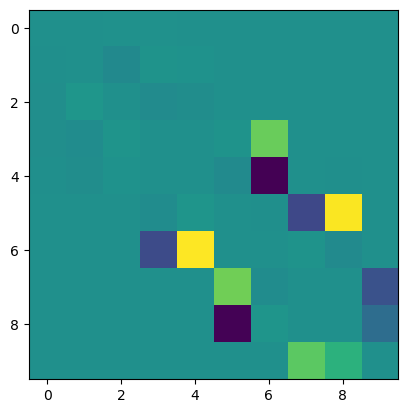

In [108]:
plt.imshow(gtn2.C_m[gtn2.L*2:gtn2.L*2+10,gtn2.L*2:gtn2.L*2+10])

In [16]:
measure_feedback_layer(gtn2)

100%|██████████| 225/225 [00:25<00:00,  8.97it/s]


In [109]:
val,vec=np.linalg.eigh(gtn2.C_m/1j)

In [20]:
from opt_einsum import contract

In [116]:
np.abs(contract(gtn2.C_m,[0,1],gtn2.C_m,[1,0],[0])+1).max()

6.217248937900877e-15

In [111]:
val

array([-1., -1., -1., ...,  1.,  1.,  1.])